## References :

https://github.com/SinghShubham19/Customer-Segmentation-in-Online-Retail/blob/main/Customer_Segmentation.ipynb

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
!pip install openpyxl

In [11]:
data=pd.read_excel("/content/Online Retail.xlsx")
df=data.copy()

In [12]:
data.head(12)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## EXPLORATORY

In [13]:
## dimension
data.shape

(541909, 8)

In [14]:
## info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [15]:
## countries
data.Country.value_counts()

,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


In [16]:
## number of customers
data.CustomerID.unique().shape[0]

4373

In [17]:
## number of StockCode	Description
print("Number of StockCode : {}".format(data.StockCode.unique().shape[0]))
print("Number of Description : {}".format(data.Description.unique().shape[0]))

Number of StockCode : 4070
Number of Description : 4224


#### MISSING VALUES

<Axes: >

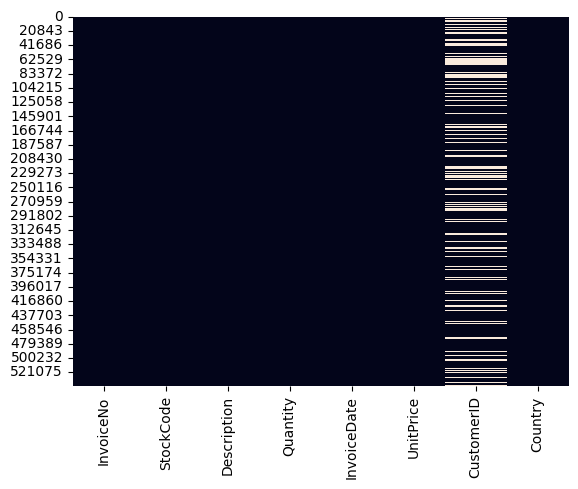

In [18]:
sns.heatmap(data.isnull(),cbar=False)

<Axes: >

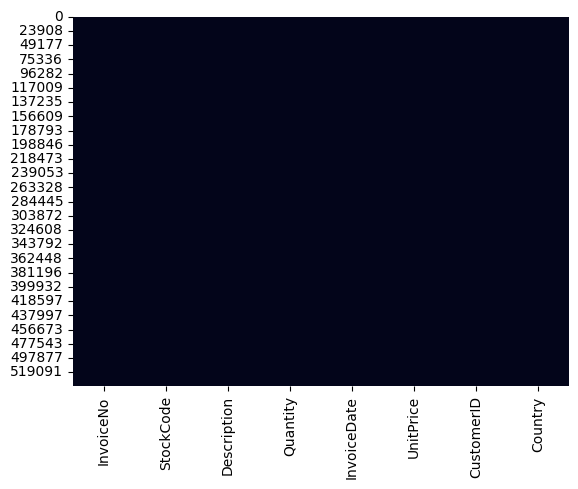

In [19]:
## Let's remove nan
data.dropna(inplace=True)
sns.heatmap(data.isnull(),cbar=False)

### CHECKING DUPLICATED DATA

In [20]:
data.duplicated().sum()

5225

In [21]:
### drop duplicated data
data.drop_duplicates(inplace=True)

In [22]:
data.shape

(401604, 8)

In [23]:
data.duplicated().sum()

0

In [24]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


NO price and No quantity <0

In [25]:
# filter price >=0 and Quantity>=0
data = data[(data['UnitPrice'] >= 0) & (data['Quantity'] >= 0)]

In [26]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392732.000000,392732,392732.000000,392732.000000
mean,13.153718,2011-07-10 19:15:24.576301568,3.125596,15287.734822
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,181.588420,NaN,22.240725,1713.567773


## RECENCY FREQUENCY MONETARY

In [27]:
## RECENCY
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
ReferenceDate=data['InvoiceDate'].max()

#grouping data by customer and getting the latest purchase date for each customer
CustDateRef=data.groupby('CustomerID')['InvoiceDate'].max().reset_index()
# calcul of recency
CustDateRef['Recency'] = (ReferenceDate - CustDateRef['InvoiceDate']).dt.days

#merging the recency value to the dataframe
data = data.merge(CustDateRef[['CustomerID', 'Recency']], on='CustomerID', how='left')

<ipython-input-27-15432d210f4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


In [28]:
data.head(12)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,371
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,371
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,371
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,371
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,371
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,371
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,371
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,371
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,371
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,31


In [29]:
### FRequency
freq = data.groupby('CustomerID')['InvoiceDate'].count().reset_index()
freq.columns = ['CustomerID', 'Frequency']
data = data.merge(freq, on='CustomerID', how='left')

In [30]:
data.head(12)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,371,297
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,371,297
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,371,297
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,371,297
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,371,297
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,371,297
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,371,297
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,371,297
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,371,297
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,31,172


In [31]:
## MOnetary
Monetary = data.groupby('CustomerID')['UnitPrice'].sum().reset_index()
Monetary.columns = ['CustomerID', 'Monetary']
data = data.merge(Monetary, on='CustomerID', how='left')

In [32]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,371,297,1176.23
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,371,297,1176.23
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,371,297,1176.23
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,371,297,1176.23
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,371,297,1176.23


## CLUSTERING : Clustering products into product categories

In [33]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

# Tokenize the product descriptions
data['Tokenized_Description'] = data['Description'].apply(word_tokenize)

# Remove stop words
stop_words = set(stopwords.words('english'))
data['Tokenized_Description'] = data['Tokenized_Description'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Perform stemming
stemmer = PorterStemmer()
data['Tokenized_Description'] = data['Tokenized_Description'].apply(lambda x: [stemmer.stem(word) for word in x])

# Perform word frequency analysis
data['Word_Counts'] = data['Tokenized_Description'].apply(Counter)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,Monetary,Tokenized_Description,Word_Counts
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,371,297,1176.23,"[white, hang, heart, t-light, holder]","{'white': 1, 'hang': 1, 'heart': 1, 't-light':..."
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,371,297,1176.23,"[white, metal, lantern]","{'white': 1, 'metal': 1, 'lantern': 1}"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,371,297,1176.23,"[cream, cupid, heart, coat, hanger]","{'cream': 1, 'cupid': 1, 'heart': 1, 'coat': 1..."
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,371,297,1176.23,"[knit, union, flag, hot, water, bottl]","{'knit': 1, 'union': 1, 'flag': 1, 'hot': 1, '..."
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,371,297,1176.23,"[red, woolli, hotti, white, heart, .]","{'red': 1, 'woolli': 1, 'hotti': 1, 'white': 1..."


In [36]:
# Perform dimensionality reduction (e.g. using TF-IDF)
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform([' '.join(x) for x in data['Tokenized_Description']])

In [37]:
from sklearn.cluster import KMeans

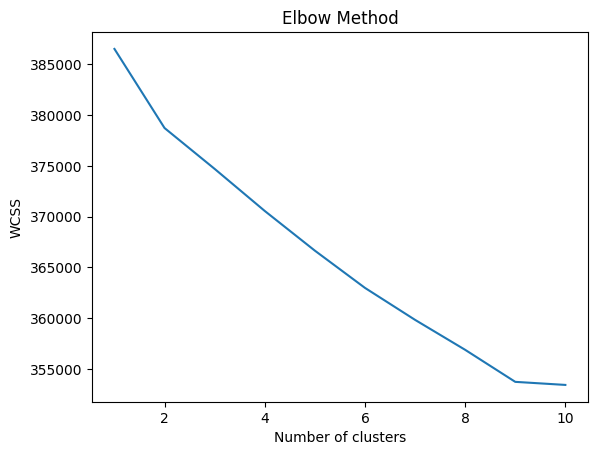

In [38]:
#elbow viz for number of k's
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

With ELbow method we see that the best K is 3

In [39]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(tfidf_matrix)
data['Product_Cluster'] = kmeans.predict(tfidf_matrix)

In [40]:
data.head(12)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,Monetary,Tokenized_Description,Word_Counts,Product_Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,371,297,1176.23,"[white, hang, heart, t-light, holder]","{'white': 1, 'hang': 1, 'heart': 1, 't-light':...",2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,371,297,1176.23,"[white, metal, lantern]","{'white': 1, 'metal': 1, 'lantern': 1}",1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,371,297,1176.23,"[cream, cupid, heart, coat, hanger]","{'cream': 1, 'cupid': 1, 'heart': 1, 'coat': 1...",1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,371,297,1176.23,"[knit, union, flag, hot, water, bottl]","{'knit': 1, 'union': 1, 'flag': 1, 'hot': 1, '...",1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,371,297,1176.23,"[red, woolli, hotti, white, heart, .]","{'red': 1, 'woolli': 1, 'hotti': 1, 'white': 1...",1
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,371,297,1176.23,"[set, 7, babushka, nest, box]","{'set': 1, '7': 1, 'babushka': 1, 'nest': 1, '...",2
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,371,297,1176.23,"[glass, star, frost, t-light, holder]","{'glass': 1, 'star': 1, 'frost': 1, 't-light':...",2
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,371,297,1176.23,"[hand, warmer, union, jack]","{'hand': 1, 'warmer': 1, 'union': 1, 'jack': 1}",1
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,371,297,1176.23,"[hand, warmer, red, polka, dot]","{'hand': 1, 'warmer': 1, 'red': 1, 'polka': 1,...",1
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,31,172,676.31,"[assort, colour, bird, ornament]","{'assort': 1, 'colour': 1, 'bird': 1, 'ornamen...",1


In [41]:
## Dimensionality reduction PCA , t-SNE, plot + interpretation
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

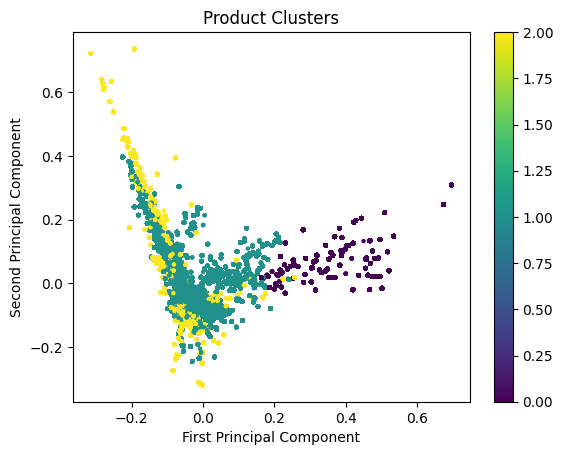

In [42]:
# Apply PCA to the TF-IDF matrix to reduce the dimensionality to 2 components
pca = PCA(n_components=2).fit_transform(tfidf_matrix.toarray())
fig, ax = plt.subplots()
scatter = ax.scatter(pca[:,0], pca[:,1], c = data['Product_Cluster'], s = 5)
ax.set_title('Product Clusters')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()

## Interpretation :

Formation of groups: Several groups of points are clearly observed, suggesting the existence of different types or categories of products. For example, there is a group at the top left (yellow/light green color), a denser group in the center (purple/black color), and a more dispersed group on the right (turquoise/dark green color).

Similarity: Products that are close to each other on the chart are more similar than those that are far away. Proximity is defined based on their position relative to the two principal components.

In [ ]:

tsne = TSNE(n_components=2, random_state=42, init='random')
tsne_data = tsne.fit_transform(tfidf_matrix)

In [ ]:
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=data['Product_Cluster'])
plt.title('t-SNE Visualization of Product Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()